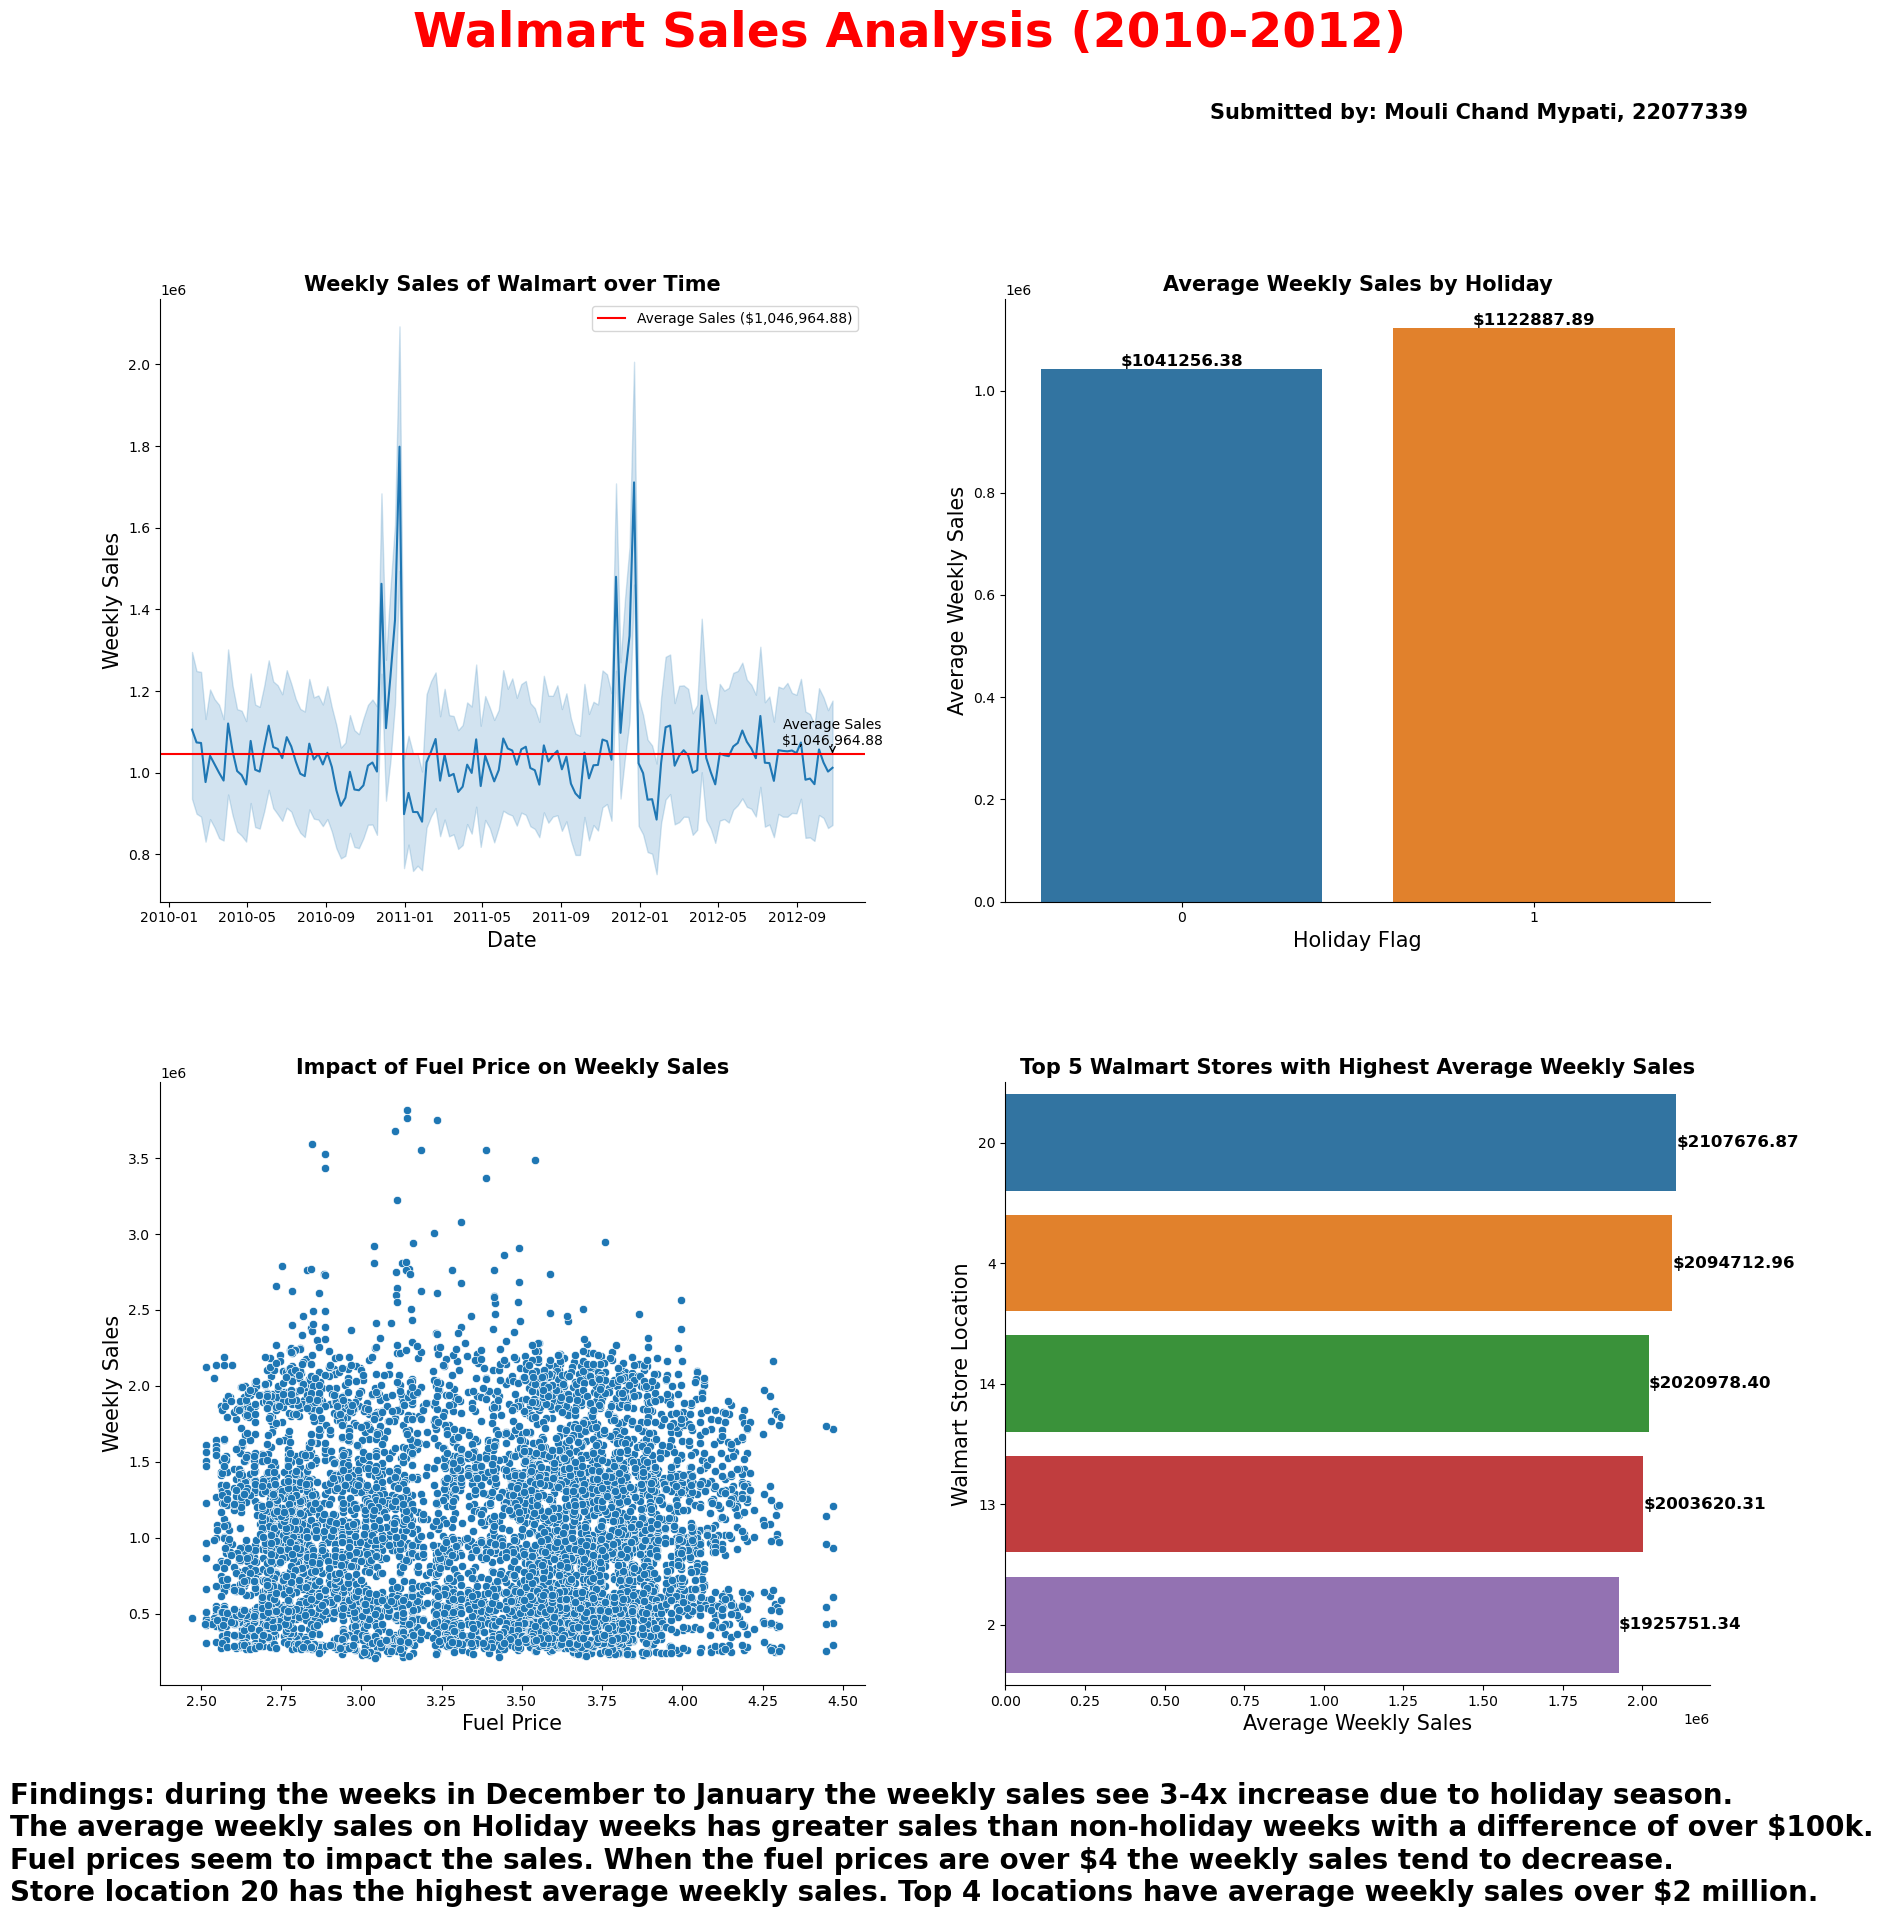

In [1]:
# https://www.kaggle.com/datasets/souravprakashai/walmart-condensed-sales-data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('walmart.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
fig.text(0.5, 1.02, 'Walmart Sales Analysis (2010-2012)', fontsize=35, fontweight='bold', color='red', ha='center')
fig.text(0.65, 0.98, 'Submitted by: Mouli Chand Mypati, 22077339', fontsize=15, fontweight='bold', color='black', ha='left')
ax1 = sns.lineplot(x='Date', y='Weekly_Sales', data=df, ax=axes[0, 0])
average_sales = df['Weekly_Sales'].mean()
ax1.axhline(y=average_sales, color='red', label=f'Average Sales (${average_sales:,.2f})')
ax1.annotate(f'Average Sales\n${average_sales:,.2f}', 
            xy=(df['Date'].iloc[-1], average_sales),
            xytext=(df['Date'].iloc[-1], average_sales + 50000),
            ha='center', va='center',
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Weekly Sales', fontsize=15)
ax1.set_title('Weekly Sales of Walmart over Time', fontsize=15, fontweight='bold')
ax1.legend()
average_sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
ax2 = sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=average_sales_by_holiday, ax=axes[0, 1])
for index, value in enumerate(average_sales_by_holiday['Weekly_Sales']):
    ax2.text(index, value, f'${value:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax2.set_xlabel('Holiday Flag', fontsize=15)
ax2.set_ylabel('Average Weekly Sales', fontsize=15)
ax2.set_title('Average Weekly Sales by Holiday', fontsize=15, fontweight='bold')
plt.subplots_adjust(hspace=0.3)
ax3 = sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, ax=axes[1, 0])
ax3.set_xlabel('Fuel Price', fontsize=15)
ax3.set_ylabel('Weekly Sales', fontsize=15)
ax3.set_title('Impact of Fuel Price on Weekly Sales', fontsize=15, fontweight='bold')
average_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
top_stores = average_sales_by_store.sort_values(by='Weekly_Sales', ascending=False).head(5)
ax4 = sns.barplot(x='Weekly_Sales', y='Store', data=top_stores, orient='h', order=top_stores['Store'], ax=axes[1, 1])
for index, value in enumerate(top_stores['Weekly_Sales']):
    ax4.text(value, index, f'${value:.2f}', ha='left', va='center', fontsize=12, fontweight='bold')
sns.despine()
ax4.set_xlabel('Average Weekly Sales', fontsize=15)
ax4.set_ylabel('Walmart Store Location', fontsize=15)
ax4.set_title('Top 5 Walmart Stores with Highest Average Weekly Sales', fontsize=15, fontweight='bold')
fig.patch.set_facecolor('white')
text = """Findings: during the weeks in December to January the weekly sales see 3-4x increase due to holiday season.
The average weekly sales on Holiday weeks has greater sales than non-holiday weeks with a difference of over $100k.
Fuel prices seem to impact the sales. When the fuel prices are over $4 the weekly sales tend to decrease.
Store location 20 has the highest average weekly sales. Top 4 locations have average weekly sales over $2 million."""
fig.text(0.05, -0.01, text, fontsize=20, va='baseline', fontweight='bold')
plt.show()